For classifying the words with tensorflow sometimes we need to know the relation of between words i.e. :

- today the ... is blue.

we need to fill the blank with sky because the blue give the sentence more meaning to the sentence now if you want to work with word embedding just you won't give a highly accuracy because you need to know the relation between blue, Today and etc.

in this cases we need to use the RNN models such as LSTM.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEQ1T7E/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEQ1T7E/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEQ1T7E/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE,  tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))


Now we create a model with bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Dense, Bidirectional, Embedding

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 66s 145ms/step - loss: 0.5254 - acc: 0.7292 - val_loss: 0.4363 - val_acc: 0.8130
Epoch 2/10
391/391 [==============================] - 55s 141ms/step - loss: 0.3438 - acc: 0.8596 - val_loss: 0.3932 - val_acc: 0.8447
Epoch 3/10
391/391 [==============================] - 56s 142ms/step - loss: 0.2725 - acc: 0.8968 - val_loss: 0.4053 - val_acc: 0.8510
Epoch 4/10
391/391 [==============================] - 57s 143ms/step - loss: 0.2769 - acc: 0.8939 - val_loss: 0.4239 - val_acc: 0.8312
Epoch 5/10
391/391 [==============================] - 56s 142ms/step - loss: 0.1935 - acc: 0.9292 - val_loss: 0.4577 - val_acc: 0.8272
Epoch 6/10
391/391 [==============================] - 56s 141ms/step - loss: 0.1558 - acc: 0.9450 - val_loss: 0.4859 - val_acc: 0.8384
Epoch 7/10
391/391 [==============================] - 56s 143ms/step - loss: 0.2539 - acc: 0.8954 - val_loss: 0.4989 - val_acc: 0.8152
Epoch 8/10
391/391 [==============================] - 5

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

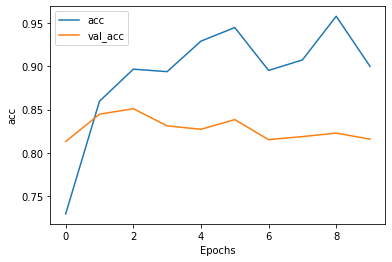

In [ ]:
plot_graphs(history, 'acc')

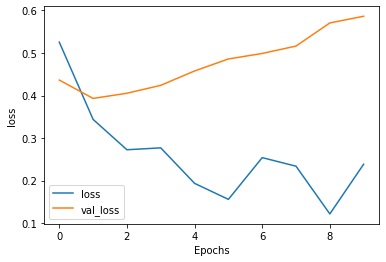

In [ ]:
plot_graphs(history, 'loss')

Now we develope mode by creating a two layer LSTM

To Connect the LSTM Layer we need to set the attribute :



```
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True))
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))
```



In [ ]:
from tensorflow.keras.layers import Dense, Bidirectional, Embedding

In [ ]:
model = tf.keras.models.Sequential([
                                    Embedding(input_dim=tokenizer.vocab_size, output_dim=64),
                                    Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                                    Bidirectional(tf.keras.layers.LSTM(32)),
                                    Dense(64, activation='relu'),
                                    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 106s 257ms/step - loss: 0.6773 - acc: 0.5480 - val_loss: 0.6937 - val_acc: 0.5016
Epoch 2/10
391/391 [==============================] - 100s 255ms/step - loss: 0.5882 - acc: 0.6875 - val_loss: 0.5298 - val_acc: 0.7628
Epoch 3/10
391/391 [==============================] - 100s 256ms/step - loss: 0.3631 - acc: 0.8446 - val_loss: 0.3782 - val_acc: 0.8334
Epoch 4/10
391/391 [==============================] - 101s 256ms/step - loss: 0.2447 - acc: 0.9036 - val_loss: 0.3547 - val_acc: 0.8447
Epoch 5/10
391/391 [==============================] - 100s 255ms/step - loss: 0.1758 - acc: 0.9352 - val_loss: 0.3536 - val_acc: 0.8482
Epoch 6/10
391/391 [==============================] - 100s 255ms/step - loss: 0.1320 - acc: 0.9544 - val_loss: 0.3665 - val_acc: 0.8652
Epoch 7/10
391/391 [==============================] - 101s 256ms/step - loss: 0.0904 - acc: 0.9711 - val_loss: 0.4081 - val_acc: 0.8628
Epoch 8/10
391/391 [============================

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

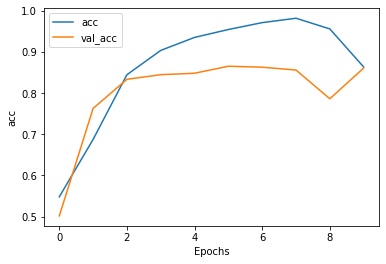

In [ ]:
plot_graphs(history, 'acc')

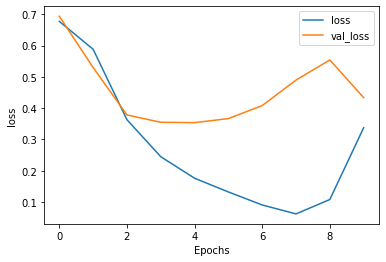

In [ ]:
plot_graphs(history, 'loss')

Now we use The GRU Model on this dataset

In [ ]:
model = tf.keras.models.Sequential([
                                    Embedding(input_dim=tokenizer.vocab_size, output_dim=64),
                                    tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    Dense(64, activation='relu'),
                                    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 68s 106ms/step - loss: 0.4607 - acc: 0.7772 - val_loss: 0.3183 - val_acc: 0.8740
Epoch 2/10
391/391 [==============================] - 21s 51ms/step - loss: 0.2267 - acc: 0.9150 - val_loss: 0.2969 - val_acc: 0.8834
Epoch 3/10
391/391 [==============================] - 19s 46ms/step - loss: 0.1702 - acc: 0.9372 - val_loss: 0.3104 - val_acc: 0.8759
Epoch 4/10
391/391 [==============================] - 17s 42ms/step - loss: 0.1349 - acc: 0.9533 - val_loss: 0.3581 - val_acc: 0.8708
Epoch 5/10
391/391 [==============================] - 16s 40ms/step - loss: 0.1105 - acc: 0.9628 - val_loss: 0.4105 - val_acc: 0.8676
Epoch 6/10
391/391 [==============================] - 16s 39ms/step - loss: 0.0879 - acc: 0.9703 - val_loss: 0.4873 - val_acc: 0.8632
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0679 - acc: 0.9792 - val_loss: 0.5683 - val_acc: 0.8567
Epoch 8/10
391/391 [==============================] - 15s 37m

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

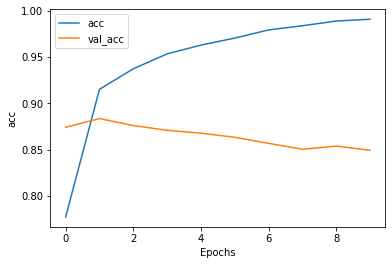

In [ ]:
plot_graphs(history, 'acc')

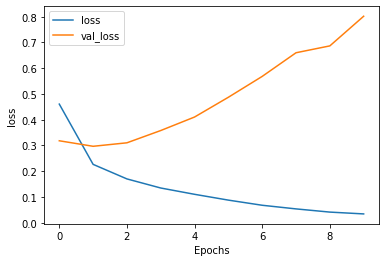

In [ ]:
plot_graphs(history, 'loss')